# Modelo SIR con dinámica vital

Simular el modelo SIR con natalidad/mortalidad (dinámica vital), visualizar dos trayectorias en el espacio de estados (S, I) y marcar los puntos de equilibrio.

**Parámetros base (R₀ > 1):**
- N = 1000
- β = 0.5 / N
- γ = 0.1
- μ = 0.02
- Horizonte de simulación: 300 unidades de tiempo

**Condiciones iniciales:**
- Brote inicial: S0=999, I0=1
- Epidemia mayor: S0=700, I0=300


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sir_vital(t, y, beta, gamma, mu, N):
    # Modelo SIR con dinámica vital
    # dS/dt = mu*(N - S) - beta*S*I
    # dI/dt = beta*S*I - (gamma + mu)*I
    S, I = y
    dS = mu*(N - S) - beta*S*I
    dI = beta*S*I - (gamma + mu)*I
    return np.array([dS, dI], dtype=float)


In [3]:
def rk4(f, y0, t, args=()):
    y = np.zeros((len(t), len(np.atleast_1d(y0))), dtype=float)
    y[0] = y0
    for k in range(len(t)-1):
        h = t[k+1] - t[k]
        k1 = f(t[k],       y[k],               *args)
        k2 = f(t[k] + h/2, y[k] + h*k1/2,      *args)
        k3 = f(t[k] + h/2, y[k] + h*k2/2,      *args)
        k4 = f(t[k] + h,   y[k] + h*k3,        *args)
        y[k+1] = y[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y


In [4]:
N = 1000.0
beta = 0.5 / N
gamma = 0.1
mu = 0.02
t_max = 300.0
dt = 0.1
t = np.arange(0.0, t_max + dt, dt)
y0_brote = np.array([999.0, 1.0])
y0_epidemia = np.array([700.0, 300.0])


In [5]:
sol_brote = rk4(sir_vital, y0_brote, t, args=(beta, gamma, mu, N))
sol_epi   = rk4(sir_vital, y0_epidemia, t, args=(beta, gamma, mu, N))
S_b, I_b = sol_brote[:,0], sol_brote[:,1]
S_e, I_e = sol_epi[:,0],   sol_epi[:,1]


In [6]:
R0 = beta * N / (gamma + mu)
S_ele, I_ele = N, 0.0
S_end = (gamma + mu) / beta
I_end = mu * (N - S_end) / (gamma + mu)
print(f'R0 = {R0:.4f}')
print(f'Equilibrio libre de enfermedad (ELE): S*={S_ele:.3f}, I*={I_ele:.3f}')
print(f'Equilibrio endémico:                 S*={S_end:.3f}, I*={I_end:.3f}')


R0 = 4.1667
Equilibrio libre de enfermedad (ELE): S*=1000.000, I*=0.000
Equilibrio endémico:                 S*=240.000, I*=126.667


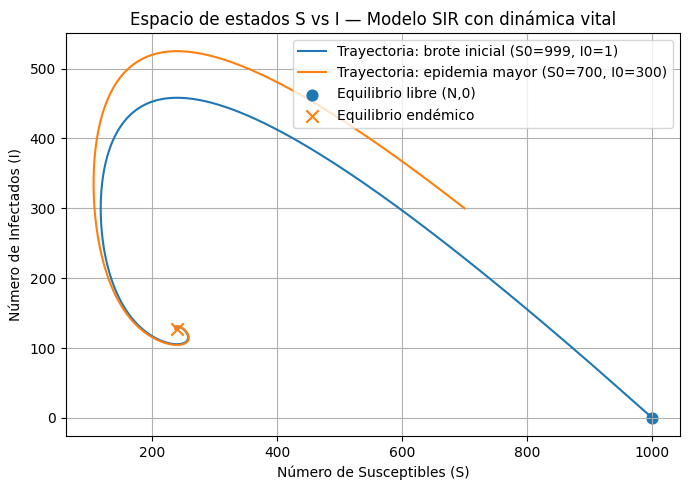

In [7]:
plt.figure(figsize=(7,5))
plt.plot(S_b, I_b, label='Trayectoria: brote inicial (S0=999, I0=1)')
plt.plot(S_e, I_e, label='Trayectoria: epidemia mayor (S0=700, I0=300)')
plt.scatter([S_ele], [I_ele], marker='o', s=60, label='Equilibrio libre (N,0)')
plt.scatter([S_end], [I_end], marker='x', s=80, label='Equilibrio endémico')
plt.xlabel('Número de Susceptibles (S)')
plt.ylabel('Número de Infectados (I)')
plt.title('Espacio de estados S vs I — Modelo SIR con dinámica vital')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Preguntas de análisis

1. Se ve como un espiral. Y si, en ambos escenarios las trayectorias convergen al mismo equilibrio endémico porque con los parámetros dados se tiene R₀>1. Numéricamente se obtiene S*=(γ+μ)/β y I*=μ(N−S*)/(γ+μ).

2. Un Arco con I₀=1. El arco representa el pico epidémico transitorio: I crece mientras S es alto, y luego desciende al agotarse susceptibles y aumentar recuperaciones/muertes, hasta estabilizarse en el nivel endémico.

3. Si R₀>1, la infección persiste (I*>0). Y visualmente, el destino final es el equilibrio endémico, consistente con la teoría.

4. Si una campaña reduce β y con ello R₀<1, las trayectorias convergerían al ELE (no hay individuos infectados), porque la transmisión ya no supera a recuperación+mortalidad y la infección se extingue.


El último prompt utilizado fue “¿Qué es ELE?”, el cual funcionó porque necesitaba aclarar el concepto de SIR con dinámica vital, permitiendo obtener una definición precisa: ELE = Equilibrio Libre de Enfermedad, punto en el que (S^*=N) e (I^*=0), indicando ausencia de infección y estabilidad solo si (R_0<1). La respuesta generada por la IA fue coherente y útil con lo que hemos visto en clase.
